In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt
import random
import time

In [2]:
def pairsTDT(data):
    pairs = np.zeros(6)
    
    for i in range(len(data)):
        pairs[int(data[i])] += 1
        
    return pairs

def TDT(pairs):
    b = pairs[0] + pairs[2] + 2*pairs[3]
    c = pairs[1] + pairs[2] + 2*pairs[4]
    
    if b+c == 0:
        T = 0
    else:
        T = ((b-c)**2)/(b+c)
    
    return T

In [3]:
def generateData(N):
    gp = np.zeros(N)
    
    for i in range(N):
        gp[i] = random.randint(0,5)
    
    return gp

In [4]:
def RR(epsilon,g,m):
    gRR = np.zeros(len(g))
    
    for i in range(len(g)):
        rand = random.random()
        if rand >= m/(math.exp(epsilon)+m-1):
            gRR[i] = g[i]
        else:
            gRR[i] = int(rand*(math.exp(epsilon)+m-1))
    
    return gRR

def recoverRR(epsilon,gRR,n,m):
    rRR = np.zeros(m)
    for i in range(m):
        rRR[i] = round(((math.exp(epsilon)+m-2)/(math.exp(epsilon)-1))*gRR[i] - ((n-gRR[i])/(math.exp(epsilon)-1)))
        if rRR[i] < 0:
            rRR[i] = 0
    rRR = rRR*(np.sum(gRR)/np.sum(rRR))
        
    return rRR

In [5]:
def Diff(N,M,epsilon):
    diff = np.zeros((2,M))
    statsTDT = np.zeros((M,2)); rstatsTDT = np.zeros(M)
    
    for i in range(M): # i: SNP, generate statistics for M SNPs
        data = generateData(N)
        statsTDT[i][0] = TDT(pairsTDT(data))
        statsTDT[i][1] = i
        RRpairs = pairsTDT(RR(epsilon,data,6))
        rpairs = recoverRR(epsilon,RRpairs,N,6)
        rstatsTDT[i] = TDT(rpairs)
    
    sstatsTDT = sorted(statsTDT, key=lambda x:(x[0]),reverse=True)
    sTDT = np.zeros(M); rsTDT = np.zeros(M); lsTDT = np.zeros(M)
    for i in range(M):
        sTDT[i] = sstatsTDT[i][0]
        
        rsTDT[i] = rstatsTDT[int(sstatsTDT[i][1])]
        diff[0][i] = math.fabs(sTDT[i]-rsTDT[i])
        
        lsTDT[i] = sTDT[i] + np.random.laplace(loc=0.0, scale=(8*(N-1)/N)/epsilon, size=1)
        if lsTDT[i] < 0:
            lsTDT[i] = 0
        diff[1][i] = math.fabs(sTDT[i]-lsTDT[i])
    
    return diff

def evaluation(N,M,epsilon):
    diff = np.zeros((2,M))
    for j in range(4):
        diff += Diff(N,M,epsilon)
    diff /= 4
    return diff

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


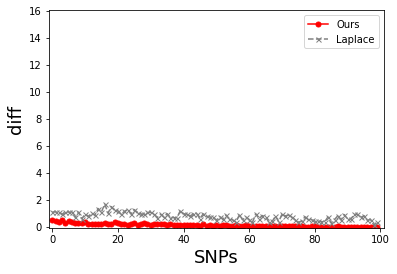

In [6]:
N = 1000; M = 100; epsilon = 7

max_diff = np.zeros((2,M)); min_diff = np.ones((2,M))*10000
sum_diff = np.zeros((2,M))

for j in range(5):
    diff = evaluation(N,M,epsilon)
    for i in range(2):
        for k in range(M):
            max_diff[i][k] = np.max([diff[i][k], max_diff[i][k]])
            min_diff[i][k] = np.min([diff[i][k], min_diff[i][k]])
            sum_diff[i][k] += diff[i][k]

diff = sum_diff / 5
y_err = np.zeros((2,2,M))
y_err[0][0] = diff[0] - min_diff[0]
y_err[1][0] = max_diff[0] - diff[0]
y_err[0][1] = diff[1] - min_diff[1]
y_err[1][1] = max_diff[1] - diff[1]
    
index = np.zeros(M)
for i in range(M):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.05, 16.05)
plt.xlim(-1, 101)
#plt.errorbar(index, diff[0], yerr = y_err[:,0,:], capsize=5, fmt='o', ecolor='r', markeredgecolor = "r", color='r')
plt.plot(index, diff[0], marker="o", markersize=5, color = "r", linestyle = "-", label = "Ours")
#plt.errorbar(index, diff[1], yerr = y_err[:,1,:], capsize=5, fmt='x', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(index, diff[1], marker="x", markersize=5, color = "gray", linestyle = "--", label = "Laplace")
plt.legend()
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("diff", fontsize = 18)
fig.savefig("diff_TDT_N=1000_epsilon=7.png")
fig.savefig("figs/diff_TDT_N=1000_epsilon=7.eps", bbox_inches="tight", pad_inches=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


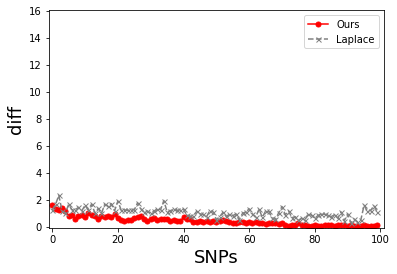

In [7]:
N = 1000; M = 100; epsilon = 5

max_diff = np.zeros((2,M)); min_diff = np.ones((2,M))*10000
sum_diff = np.zeros((2,M))

for j in range(5):
    diff = evaluation(N,M,epsilon)
    for i in range(2):
        for k in range(M):
            max_diff[i][k] = np.max([diff[i][k], max_diff[i][k]])
            min_diff[i][k] = np.min([diff[i][k], min_diff[i][k]])
            sum_diff[i][k] += diff[i][k]

diff = sum_diff / 5
y_err = np.zeros((2,2,M))
y_err[0][0] = diff[0] - min_diff[0]
y_err[1][0] = max_diff[0] - diff[0]
y_err[0][1] = diff[1] - min_diff[1]
y_err[1][1] = max_diff[1] - diff[1]
    
index = np.zeros(M)
for i in range(M):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.05, 16.05)
plt.xlim(-1, 101)
#plt.errorbar(index, diff[0], yerr = y_err[:,0,:], capsize=5, fmt='o', ecolor='r', markeredgecolor = "r", color='r')
plt.plot(index, diff[0], marker="o", markersize=5, color = "r", linestyle = "-", label = "Ours")
#plt.errorbar(index, diff[1], yerr = y_err[:,1,:], capsize=5, fmt='x', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(index, diff[1], marker="x", markersize=5, color = "gray", linestyle = "--", label = "Laplace")
plt.legend()
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("diff", fontsize = 18)
fig.savefig("diff_TDT_N=1000_epsilon=5.png")
fig.savefig("figs/diff_TDT_N=1000_epsilon=5.eps", bbox_inches="tight", pad_inches=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


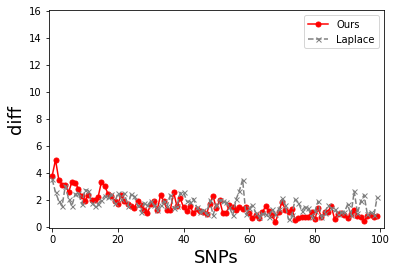

In [8]:
N = 1000; M = 100; epsilon = 3

max_diff = np.zeros((2,M)); min_diff = np.ones((2,M))*10000
sum_diff = np.zeros((2,M))

for j in range(5):
    diff = evaluation(N,M,epsilon)
    for i in range(2):
        for k in range(M):
            max_diff[i][k] = np.max([diff[i][k], max_diff[i][k]])
            min_diff[i][k] = np.min([diff[i][k], min_diff[i][k]])
            sum_diff[i][k] += diff[i][k]

diff = sum_diff / 5
y_err = np.zeros((2,2,M))
y_err[0][0] = diff[0] - min_diff[0]
y_err[1][0] = max_diff[0] - diff[0]
y_err[0][1] = diff[1] - min_diff[1]
y_err[1][1] = max_diff[1] - diff[1]
    
index = np.zeros(M)
for i in range(M):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.05, 16.05)
plt.xlim(-1, 101)
#plt.errorbar(index, diff[0], yerr = y_err[:,0,:], capsize=5, fmt='o', ecolor='r', markeredgecolor = "r", color='r')
plt.plot(index, diff[0], marker="o", markersize=5, color = "r", linestyle = "-", label = "Ours")
#plt.errorbar(index, diff[1], yerr = y_err[:,1,:], capsize=5, fmt='x', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(index, diff[1], marker="x", markersize=5, color = "gray", linestyle = "--", label = "Laplace")
plt.legend()
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("diff", fontsize = 18)
fig.savefig("diff_TDT_N=1000_epsilon=3.png")
fig.savefig("figs/diff_TDT_N=1000_epsilon=3.eps", bbox_inches="tight", pad_inches=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


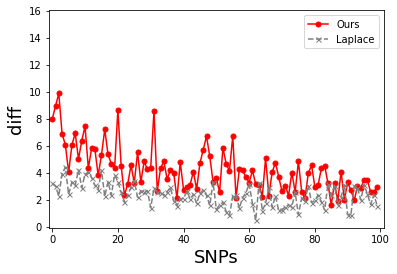

In [9]:
N = 1000; M = 100; epsilon = 2

max_diff = np.zeros((2,M)); min_diff = np.ones((2,M))*10000
sum_diff = np.zeros((2,M))

for j in range(5):
    diff = evaluation(N,M,epsilon)
    for i in range(2):
        for k in range(M):
            max_diff[i][k] = np.max([diff[i][k], max_diff[i][k]])
            min_diff[i][k] = np.min([diff[i][k], min_diff[i][k]])
            sum_diff[i][k] += diff[i][k]

diff = sum_diff / 5
y_err = np.zeros((2,2,M))
y_err[0][0] = diff[0] - min_diff[0]
y_err[1][0] = max_diff[0] - diff[0]
y_err[0][1] = diff[1] - min_diff[1]
y_err[1][1] = max_diff[1] - diff[1]
    
index = np.zeros(M)
for i in range(M):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.05, 16.05)
plt.xlim(-1, 101)
#plt.errorbar(index, diff[0], yerr = y_err[:,0,:], capsize=5, fmt='o', ecolor='r', markeredgecolor = "r", color='r')
plt.plot(index, diff[0], marker="o", markersize=5, color = "r", linestyle = "-", label = "Ours")
#plt.errorbar(index, diff[1], yerr = y_err[:,1,:], capsize=5, fmt='x', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(index, diff[1], marker="x", markersize=5, color = "gray", linestyle = "--", label = "Laplace")
plt.legend()
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("diff", fontsize = 18)
fig.savefig("diff_TDT_N=1000_epsilon=2.png")
fig.savefig("figs/diff_TDT_N=1000_epsilon=2.eps", bbox_inches="tight", pad_inches=0.05)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


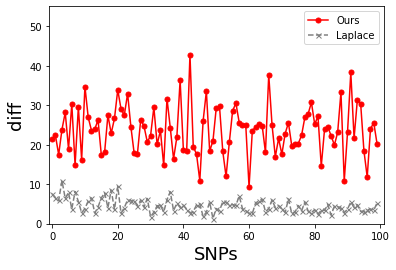

In [10]:
N = 1000; M = 100; epsilon = 1

max_diff = np.zeros((2,M)); min_diff = np.ones((2,M))*10000
sum_diff = np.zeros((2,M))

for j in range(5):
    diff = evaluation(N,M,epsilon)
    for i in range(2):
        for k in range(M):
            max_diff[i][k] = np.max([diff[i][k], max_diff[i][k]])
            min_diff[i][k] = np.min([diff[i][k], min_diff[i][k]])
            sum_diff[i][k] += diff[i][k]

diff = sum_diff / 5
y_err = np.zeros((2,2,M))
y_err[0][0] = diff[0] - min_diff[0]
y_err[1][0] = max_diff[0] - diff[0]
y_err[0][1] = diff[1] - min_diff[1]
y_err[1][1] = max_diff[1] - diff[1]
    
index = np.zeros(M)
for i in range(M):
    index[i] = i

fig = plt.figure()
plt.ylim(-0.05, 55.05)
plt.xlim(-1, 101)
#plt.errorbar(index, diff[0], yerr = y_err[:,0,:], capsize=5, fmt='o', ecolor='r', markeredgecolor = "r", color='r')
plt.plot(index, diff[0], marker="o", markersize=5, color = "r", linestyle = "-", label = "Ours")
#plt.errorbar(index, diff[1], yerr = y_err[:,1,:], capsize=5, fmt='x', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(index, diff[1], marker="x", markersize=5, color = "gray", linestyle = "--", label = "Laplace")
plt.legend()
plt.xlabel("SNPs", fontsize = 18)
plt.ylabel("diff", fontsize = 18)
fig.savefig("diff_TDT_N=1000_epsilon=1.png")
fig.savefig("figs/diff_TDT_N=1000_epsilon=1.eps", bbox_inches="tight", pad_inches=0.05)